In [1]:
import numpy as np
import matplotlib.pyplot as plt

from hcipy import *

In [4]:
pupil_grid = make_pupil_grid(256)

In [9]:
telescope_pupil_generator = make_magellan_aperture(normalized=True)

In [14]:
telescope_pupil = (telescope_pupil_generator(pupil_grid))

In [27]:
print(len([p for p in telescope_pupil if p > 0]),
len([p for p in telescope_pupil if p == 0.0]))

46708 18828


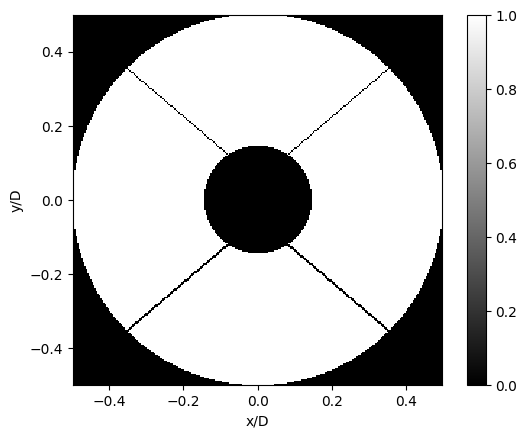

In [20]:
im = imshow_field(telescope_pupil, cmap='gray')
plt.colorbar()
plt.xlabel('x/D')
plt.ylabel('y/D')
plt.show()

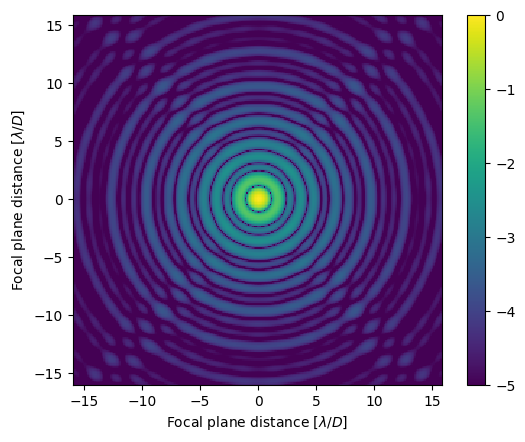

In [64]:
# We want to see what happens when we image a point source (such as a distant star) with a telescope that has this particular telescope pupil geometry. We first create a Wavefront object, and pass it the telescope pupil as the corresponding electric field. This Wavefront is the light just after it reflected of the Magellan primary mirror. Wavefronts are used for all light in HCIPy, and they can be modified by propagating the light through OpticalElements, but more on that below.

# We now need to define the sampling of the PSF that we want to obtain. This is done with the make_focal_grid() function. This function takes q, which is the number of pixels per diffraction width, and num_airy, which is half size (ie. radius) of the image in the number of diffraction widths.
wavefront = Wavefront(telescope_pupil)

focal_grid = make_focal_grid(q=8, num_airy=16)
prop = FraunhoferPropagator(pupil_grid, focal_grid)

focal_image = prop.forward(wavefront)

imshow_field(np.log10(focal_image.intensity / focal_image.intensity.max()), vmin=-5)
plt.xlabel('Focal plane distance [$\lambda/D$]')
plt.ylabel('Focal plane distance [$\lambda/D$]')
plt.colorbar()
plt.show()

In [58]:
psf = focal_image.intensity

psf_shape = psf.grid.shape

slicefoc = psf.shaped[:, psf_shape[0] // 2]
slicefoc_normalised = slicefoc / psf.max()

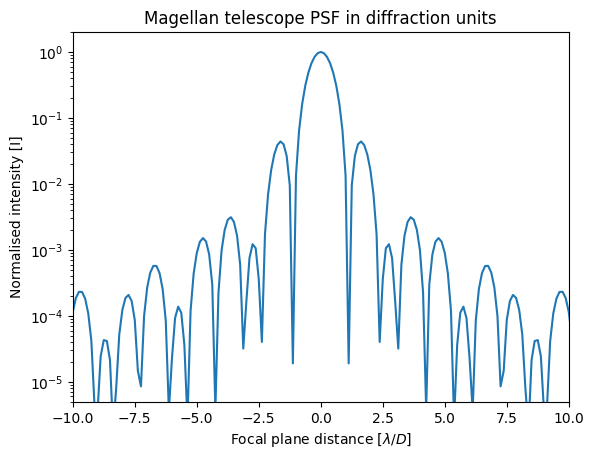

In [63]:
plt.plot(focal_grid.x.reshape(psf_shape)[0, :], slicefoc_normalised)
plt.xlabel('Focal plane distance [$\lambda/D$]')
plt.ylabel('Normalised intensity [I]')
plt.yscale('log')
plt.title('Magellan telescope PSF in diffraction units')
plt.xlim(-10, 10)
plt.ylim(5e-6, 2)
plt.show()


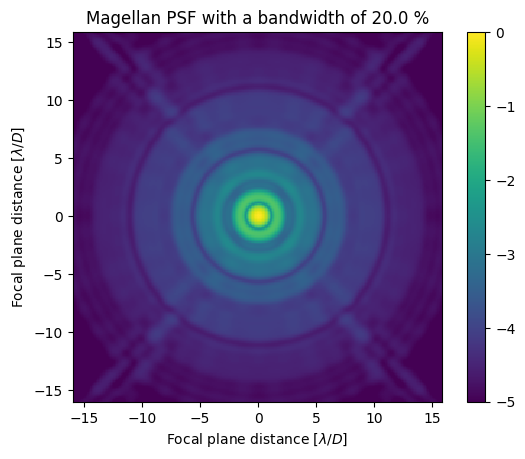

In [65]:
bandwidth = 0.2
focal_total = 0
for wlen in np.linspace(1-bandwidth/ 2., 1 + bandwidth / 2., 11):
    wavefront = Wavefront(telescope_pupil, wlen)
    focal_total += prop(wavefront).intensity

imshow_field(np.log10(focal_total / focal_total.max()), vmin=-5)

plt.title('Magellan PSF with a bandwidth of {:.1f} %'.format(bandwidth * 100))
plt.colorbar()
plt.xlabel('Focal plane distance [$\lambda/D$]')
plt.ylabel('Focal plane distance [$\lambda/D$]')
plt.show()